# Example Notebook with manual well selection

The following notebook will walk you through the analysis of a 48-well wellplate containing 24 samples of Candelilla Wax and the remaining Xylitol samples. 

#### Import the necessary packages 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import thermal_analysis as ta
import image_analysis as ia
import data_management as dm
from ipywidgets import interactive

In [3]:
%matplotlib inline

In [4]:
plt.rcParams['figure.max_open_warning'] = False

___
___

## Image Analysis 

1. Import the video from the Raspoberry Pi interface of the PhasIR system.

In [5]:
# Inputting the video as a stack of arrays
frames_48 = ia.input_file('../data/20210217_Cand_Xyl_HP_150C_Wed_Feb_17_11-47-44_2021.HDF5')

2. Crop the image to remove the background and any additional object in the frame

In [6]:
interactive_image, height, width = ia.manual_crop(frames_48[-1])

In [19]:
interactive_image, height, width = ia.manual_crop(frames_48[-1])
size_widget= interactive(interactive_image, width=width, height=height)
size_widget

interactive(children=(IntRangeSlider(value=(0, 160), description='Width:', max=160), IntRangeSlider(value=(0, …

In [28]:
cropped_frames= ia.crop_frames(size_widget, frames_48)

3. Find centroid using manual selection

Note: You will have to change the image display in matplotlib using `%matplotloib qt`

In [31]:
%matplotlib qt

In [32]:
centroids= ia.manual_centroid(cropped_frames[-1])

Remember to run the following command:  % matplotlib qt 
This way you are enabling the pop-up option for images

Select the centroid of each well. Right click once done. Middle mouse button removes most recent point.

Now run the following command:  % matplotlib inline 
to reset the image visualization as inline in JN


In [18]:
%matplotlib inline

4. Identify the plate position based on the centroid of each well

In [33]:
plate_loc_48 = ia.plate_location(centroids, 8,6)
plt.imshow(cropped_frames[-1])
plt.scatter(centroids['Column'],centroids['Row'], c='k', s=3)
plt.scatter(plate_loc_48['Plate_col'],plate_loc_48['Plate_row'], c='r', s=3)

## Thermal Analysis

Based on the coordinates found in the image analysis section, the temperature profile of each sample and the plate temperature are obtained for each well in the frame. 

* Sample Temperature : Temperature taken as the average value of the pixels forming a  circle centered around the centroid with variable radius _r_

* Plate Temperature : Temperature taken as the average of the four diagonally spaced around each well.

In [22]:
sample_temp_48, plate_temp_48 = ta.pixel_intensity(points,plate_loc_48, cropped_frames, r=2)

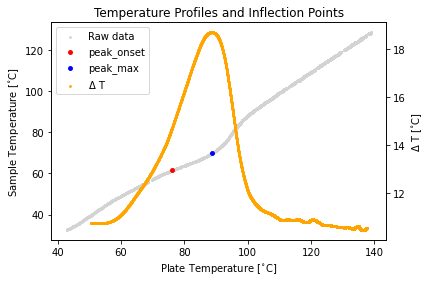

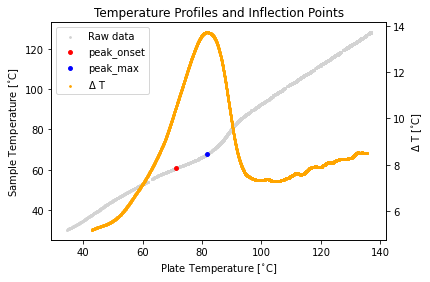

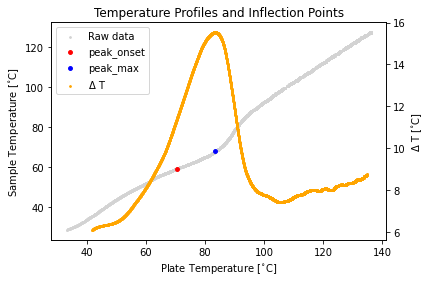

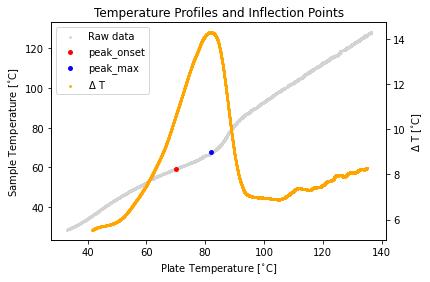

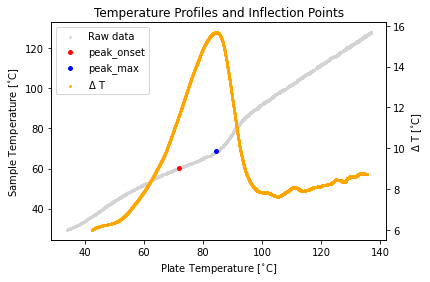

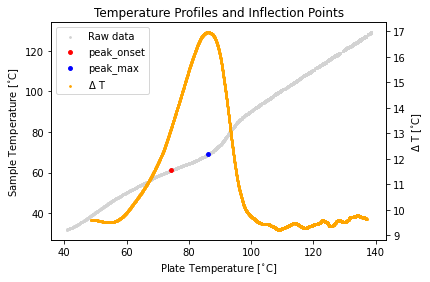

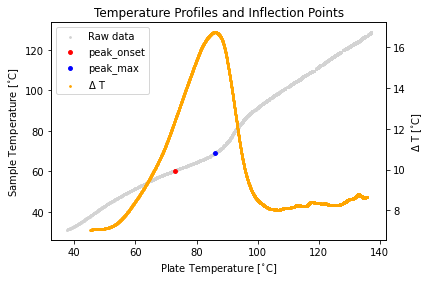

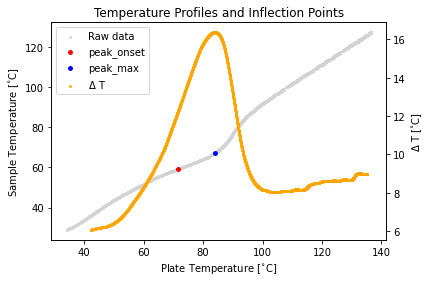

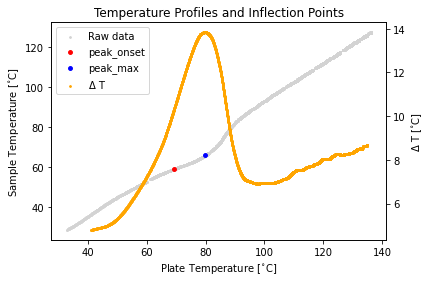

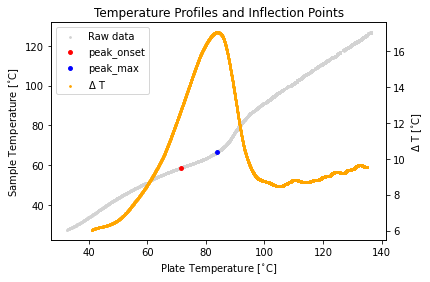

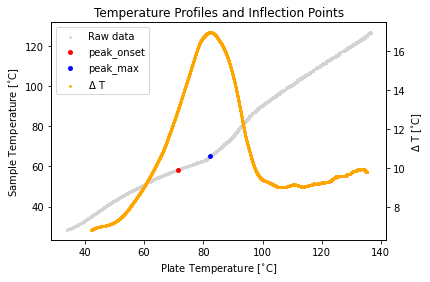

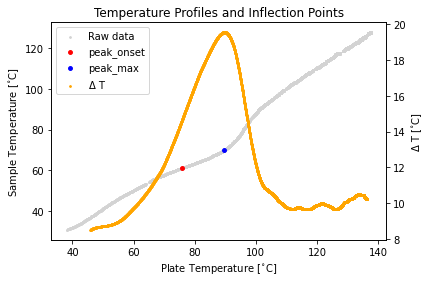

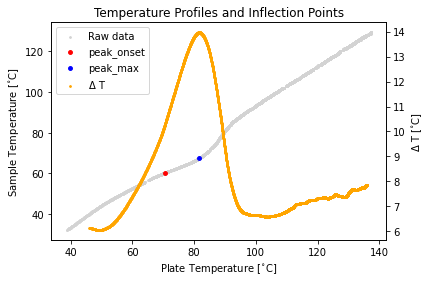

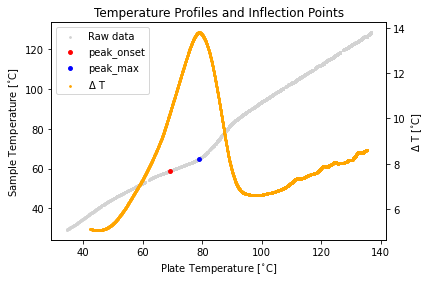

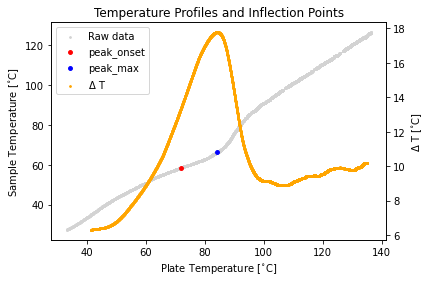

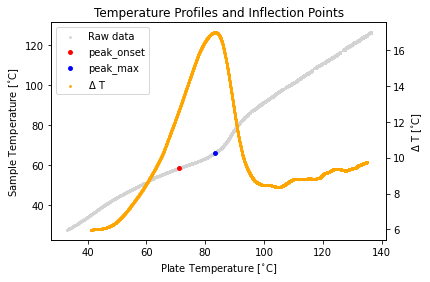

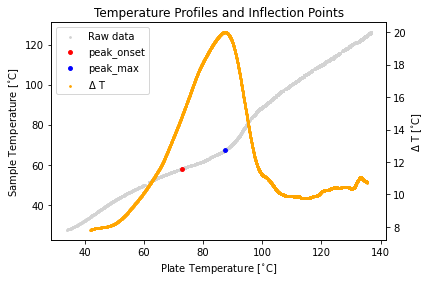

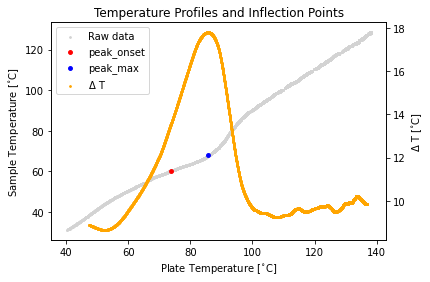

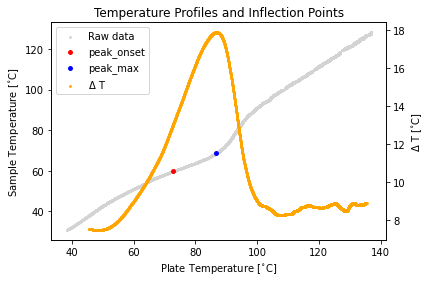

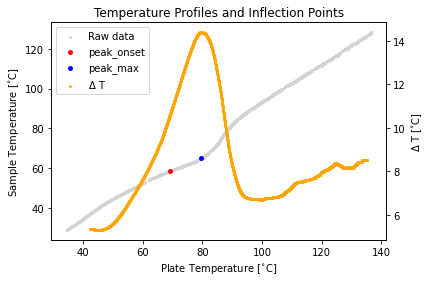

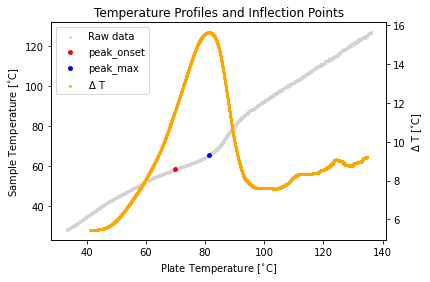

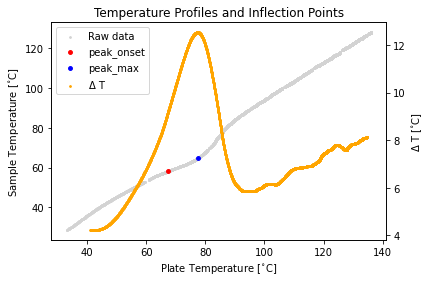

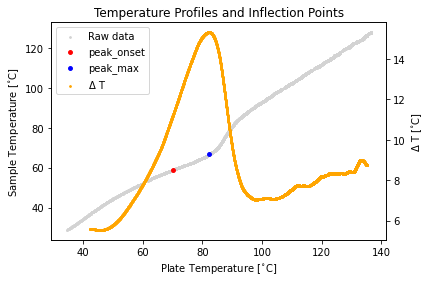

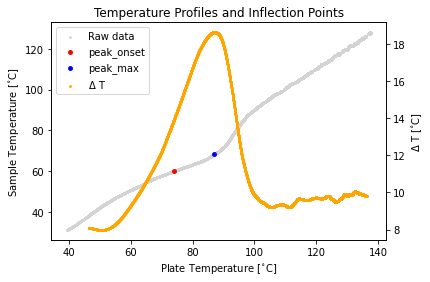

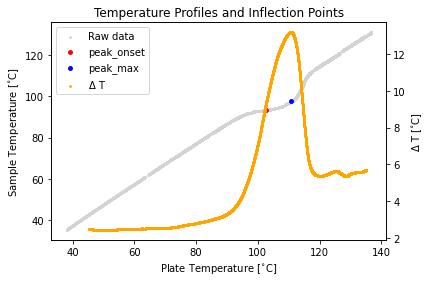

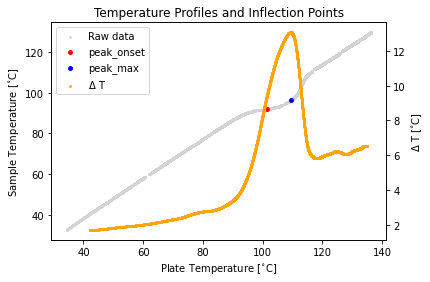

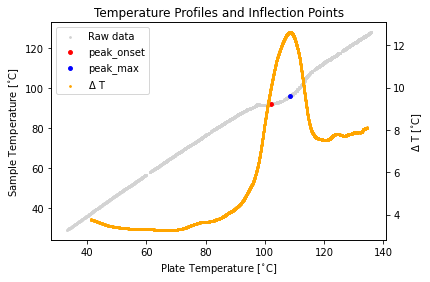

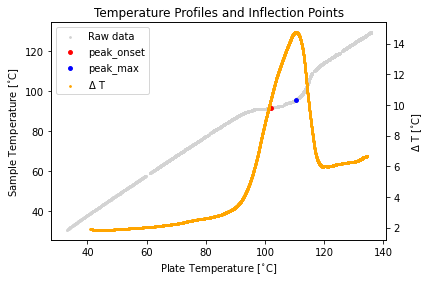

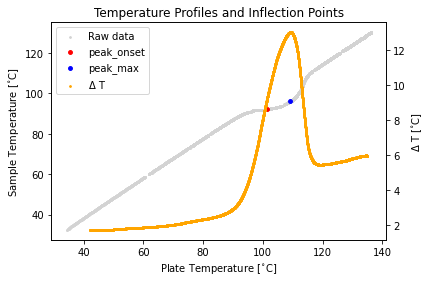

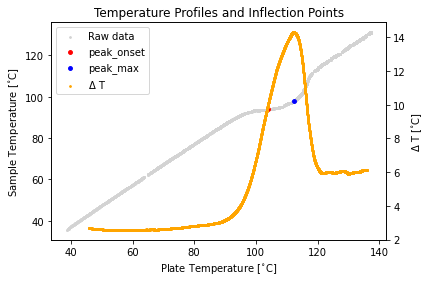

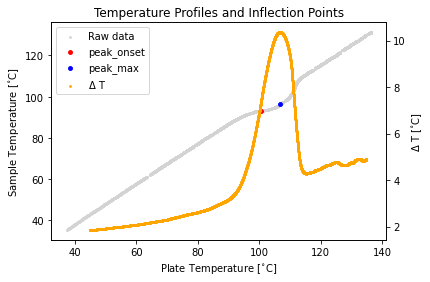

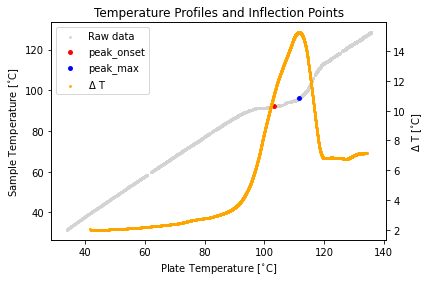

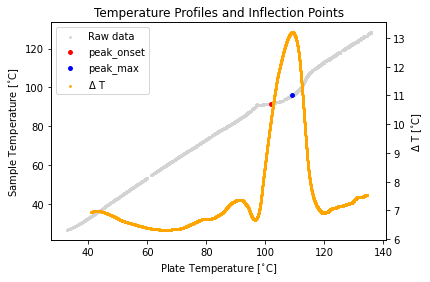

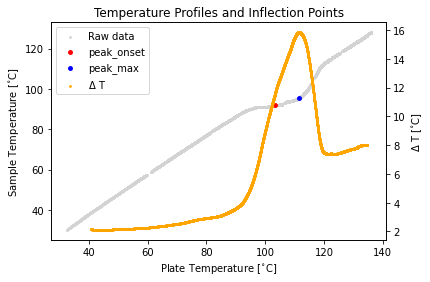

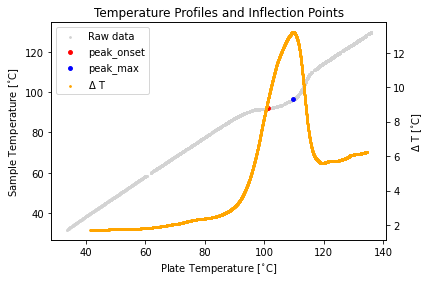

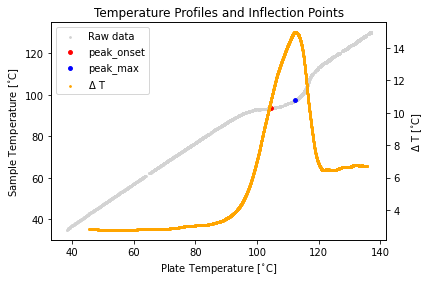

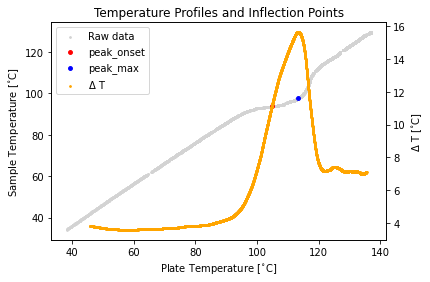

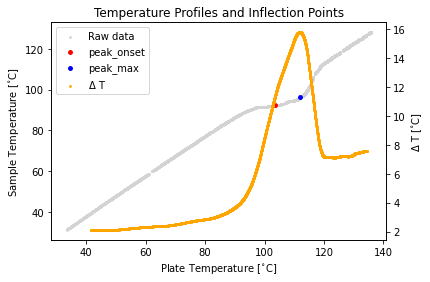

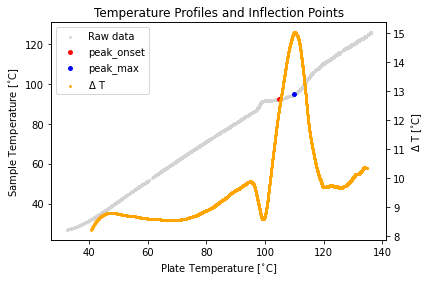

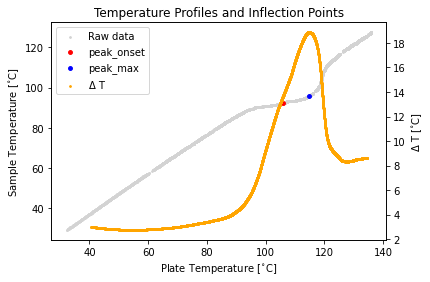

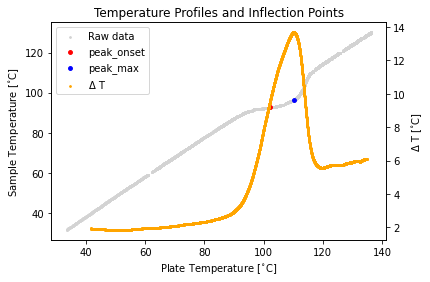

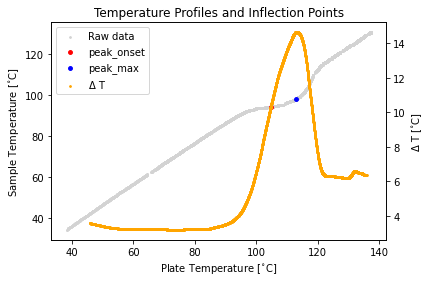

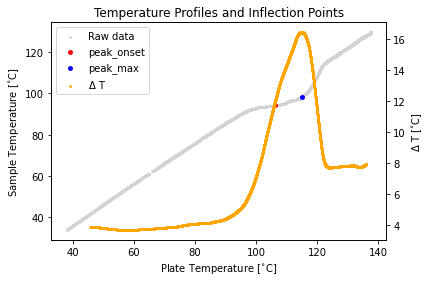

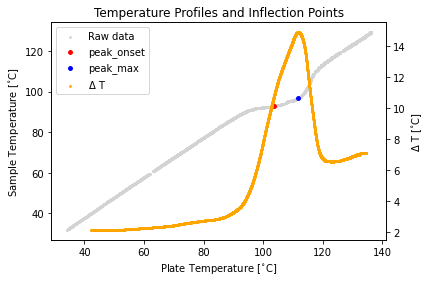

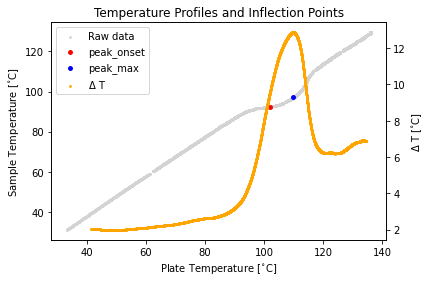

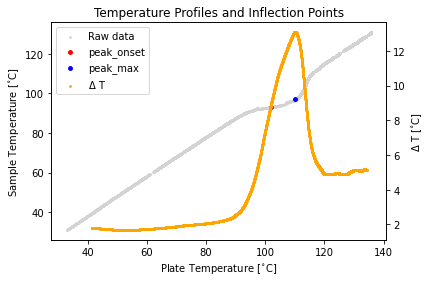

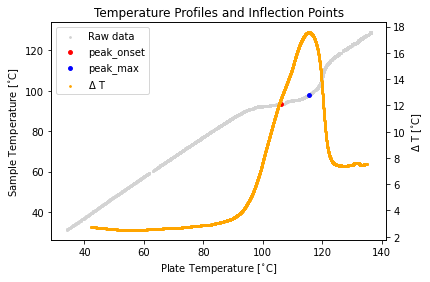

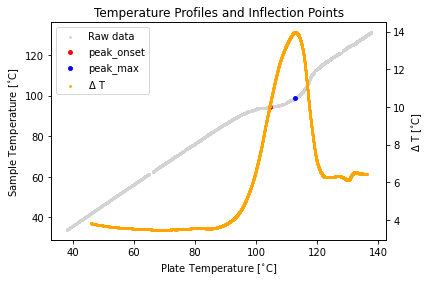

In [23]:
temp_df = ta.phase_transition_temperature(plate_temp_48, sample_temp_48,plot=True)

Since the analyzed plate contained multiple repeats of the same substances, the following cells are used to look at the variability of results across the plate

In [24]:
print('Candelilla wax\n')
Candelilla_sample_temp = np.average(temp_df['Sample_temp_onset'].loc[:23])
C_sample_temp_std = np.std(temp_df['Sample_temp_onset'].loc[:23])
print('Onset Melting temperature from: \nSample: {:.2f} \u00B1 {:.2f} \nLiterature: {}'.format(
    Candelilla_sample_temp,C_sample_temp_std, '68'))

Candelilla_sample_temp = np.average(temp_df['Sample_temp_peak'].loc[:24])
C_sample_temp_std = np.std(temp_df['Sample_temp_peak'].loc[:24])
print('\nPeak Melting temperature from: \nSample: {:.2f} \u00B1 {:.2f} \nLiterature: {}'.format(
    Candelilla_sample_temp,C_sample_temp_std,'68'))

Candelilla wax

Onset Melting temperature from: 
Sample: 59.46 ± 1.02 
Literature: 68

Peak Melting temperature from: 
Sample: 68.58 ± 6.08 
Literature: 68


In [25]:
print('Xylitol wax\n')
Xylitol_sample_temp = np.average(temp_df['Sample_temp_onset'].loc[24:])
X_sample_temp_std = np.std(temp_df['Sample_temp_onset'].loc[24:])
print('Onset Melting temperature from: \nSample: {:.2f} \u00B1 {:.2f} \nLiterature: {}'.format(
    Xylitol_sample_temp,X_sample_temp_std, '92'))

Xylitol_sample_temp = np.average(temp_df['Sample_temp_peak'].loc[24:])
X_sample_temp_std = np.std(temp_df['Sample_temp_peak'].loc[24:])
print('\nPeak Melting temperature from: \nSample: {:.2f} \u00B1 {:.2f} \nLiterature: {}'.format(
    Xylitol_sample_temp,X_sample_temp_std,'92'))

Xylitol wax

Onset Melting temperature from: 
Sample: 92.81 ± 0.87 
Literature: 92

Peak Melting temperature from: 
Sample: 96.80 ± 0.99 
Literature: 92


___
___

In [ ]:
dm.save_results(sample_temp_48, plate_temp_48, './', 'my_test_data', 8,6)